<h6 style='text-align:center;font-size:40px;background-color:SALMON;border:20px;color:white'>HOUSE PRICE  PREDICTION<h6>

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:50px;color:white'>PROBLEM STATEMENT<h2>

Pri-Ame Estate Solutions, a prominent real estate company in Nigeria, is facing challenges in accurately predicting house prices in the current market. The goal is to create a reliable tool that can estimate house prices by analyzing various factors impacting them, thereby aiding informed pricing decisions and enhancing market competitiveness.

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 1: Importing the Relevant Libraries <h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df_train = pd.read_csv('Housing_dataset_train.csv')
df_test = pd.read_csv('Housing_dataset_test.csv')

In [8]:
df_train.head(5)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [10]:
df_test.head(5)

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 2. Train Data Inspection<h2>

In [13]:
df_train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [15]:
df_train.shape

(14000, 7)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [19]:
df_train.nunique()

ID               10182
loc                 36
title               10
bedroom              9
bathroom             7
parking_space        6
price            10727
dtype: int64

In [21]:
df_train.dtypes

ID                 int64
loc               object
title             object
bedroom          float64
bathroom         float64
parking_space    float64
price            float64
dtype: object

In [23]:
data = [df_train]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df_train[col].value_counts())


Frequency of Categories for variable loc
loc
Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: count, dtype: int64

Frequency of Categories for variable title
title
Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex

In [25]:
df_train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 2. Test Data Inspection<h2>

In [28]:
df_test.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [30]:
df_test.shape

(6000, 6)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [34]:
df_test.nunique()

ID               5191
loc                36
title              10
bedroom             9
bathroom            7
parking_space       6
dtype: int64

In [36]:
df_test.dtypes

ID                int64
loc              object
title            object
bedroom           int64
bathroom          int64
parking_space     int64
dtype: object

In [38]:
data = [df_test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df_test[col].value_counts())


Frequency of Categories for variable loc
loc
Benue          188
Borno          188
Ogun           185
Oyo            183
Anambra        180
Kogi           177
Abia           175
Katsina        175
Bauchi         175
Adamawa        175
Lagos          174
Nasarawa       172
Ekiti          170
Kebbi          170
Kano           170
Delta          169
Osun           168
Taraba         167
Ondo           167
Kaduna         166
Zamfara        165
Edo            165
Cross River    163
Sokoto         163
Enugu          159
Plateau        159
Bayelsa        159
Niger          159
Yobe           159
Gombe          158
Akwa Ibom      155
Jigawa         155
Imo            152
Ebonyi         147
Kwara          144
Rivers         144
Name: count, dtype: int64

Frequency of Categories for variable title
title
Mansion                 673
Flat                    654
Townhouse               653
Apartment               642
Bungalow                641
Semi-detached duplex    640
Penthouse               62

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 3. Train Data Cleaning <h2>

In [41]:
# Fill missing numerical values with the median
df_train['bedroom'].fillna(df_train['bedroom'].median(), inplace=True)
df_train['bathroom'].fillna(df_train['bathroom'].median(), inplace=True)
df_train['parking_space'].fillna(df_train['parking_space'].median(), inplace=True)

# Fill missing categorical values with the mode or a placeholder
df_train['loc'].fillna(df_train['loc'].mode()[0], inplace=True)
df_train['title'].fillna('Unknown', inplace=True)


In [43]:
df_train.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [45]:
for col in df_train.columns:
    print(f"'{col}'")

'ID'
'loc'
'title'
'bedroom'
'bathroom'
'parking_space'
'price'


In [47]:
# Drop the columns that are not needed for the analysis
df_train.drop(columns=['ID'], inplace=True, errors='ignore')


In [49]:
df_train.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,Ekiti,Unknown,7.0,5.0,3.0,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 3. Test Data Cleaning <h2>

In [52]:
df_test.describe()

,ID,bedroom,bathroom,parking_space
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4818.699167,4.329833,3.105667,3.132333
std,3832.336902,2.454733,2.033189,1.604551
min,2.000000,1.000000,1.000000,1.000000
25%,1647.000000,2.000000,1.000000,2.000000
50%,3433.000000,4.000000,2.000000,3.000000
75%,7970.000000,6.000000,5.000000,4.000000
max,12995.000000,9.000000,7.000000,6.000000


In [54]:
# Drop the columns that are not needed for the analysis
df_test.drop(columns=['ID'], inplace=True, errors='ignore')


In [56]:
df_test.head()

,loc,title,bedroom,bathroom,parking_space
0,Kano,Penthouse,4,1,2
1,Adamawa,Apartment,2,2,4
2,Adamawa,Bungalow,2,7,2
3,Lagos,Mansion,9,5,2
4,Gombe,Semi-detached duplex,5,6,1


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 4. Exploratory Data Analysis (Train Data) <h2>

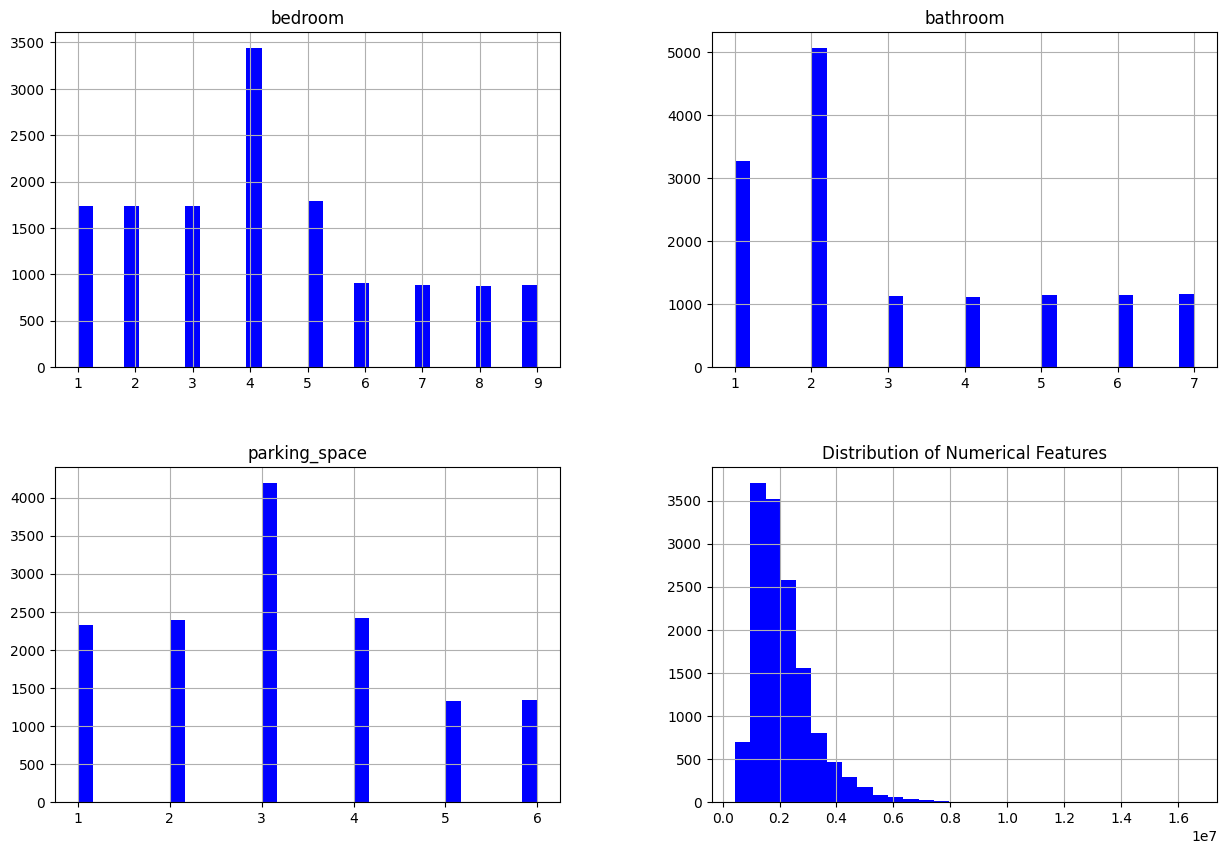

In [59]:
# Plot histograms for all numerical features
df_train.hist(bins=30, figsize=(15, 10), color='blue')
plt.title('Distribution of Numerical Features')
plt.show()


From the Above Visualization:

* Bedroom: This bar chart depicts the distribution of homes according to the number of bedrooms.
The most common number of bedrooms is four, followed by three. The frequency decreases significantly as the number of bedrooms grows to five or more, indicating that larger residences are less prevalent.

* Bathroom: This bar chart depicts the distribution of homes according to the number of bathrooms.
Most properties have two bathrooms, however one-bathroom properties are still relatively prevalent. Properties with three or more bathrooms are far less common, with a notable decrease after two bathrooms.

* Parking_Space: This bar chart depicts the distribution of properties according to the number of parking_space.
Properties with three parking spaces are the most prevalent, followed by those with one or two spaces. The frequency decreases for properties with four or more parking spaces, indicating that they are less common.

* Distribution of Numerical Features: This histogram depicts the distribution of a given numerical feature, most often the price. 
The distribution appears to be right-skewed, indicating that the majority of properties are clustered at the lower end of the price range, with fewer at higher price points. This skewness indicates that, while high-priced homes exist, they are rather rare as compared to lower-priced ones.

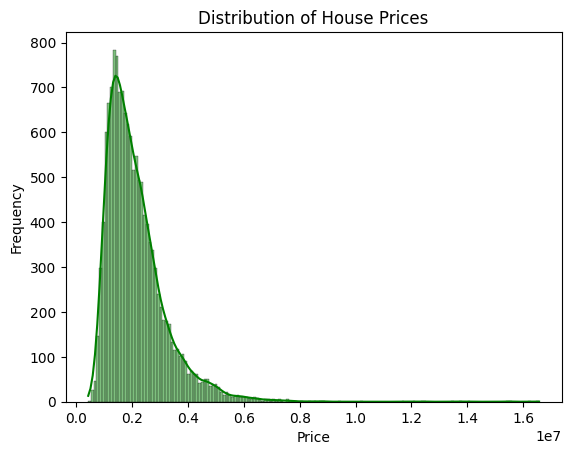

In [62]:
# Assuming 'price' is the target variable
sns.histplot(df_train['price'], kde=True, color='green')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram leans to the right showing that most house prices are not in demand at the lower end of the price range. The shape stretches out to the right, which means there are some pricey houses, but not many. This pattern suggests that cheaper homes make up most of the housing market in this dataset, with a few high-end properties. You'll see this kind of lopsided spread in many real estate markets where most houses are priced at levels people can afford, and a small number come with premium price tags.

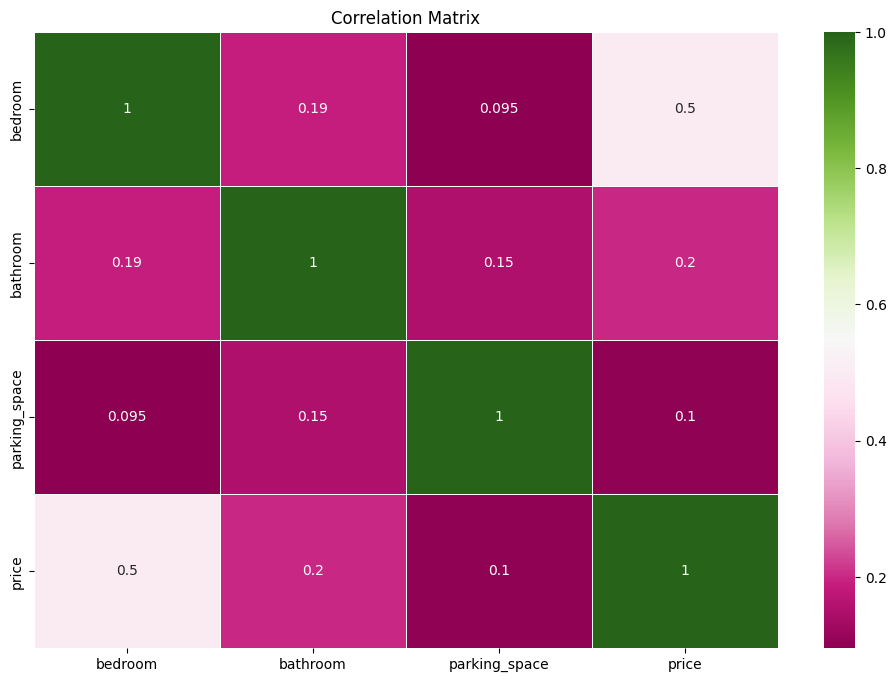

In [65]:
# Select only numerical columns
numerical_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Key Observation

* bedroom vs. price (0.5): The number of bedrooms has an influence on the price showing a moderate positive link. This means houses with more bedrooms often cost more.
* bathroom vs. price (0.2): The number of bathrooms also has an impact on the price, but less so than bedrooms.
* parking_space vs. price (0.1): Parking spaces have a small effect on price. This shows that parking doesn't change the price much.
* bedroom vs. bathroom (0.19): Bedrooms and bathrooms have a slight connection. Homes with more bedrooms might have more bathrooms, but this link isn't strong.
* parking_space vs. other features: Parking spaces don't relate much to bedrooms (0.095) or bathrooms (0.15). This means the number of parking spots doesn't tie to bedroom or bathroom count.

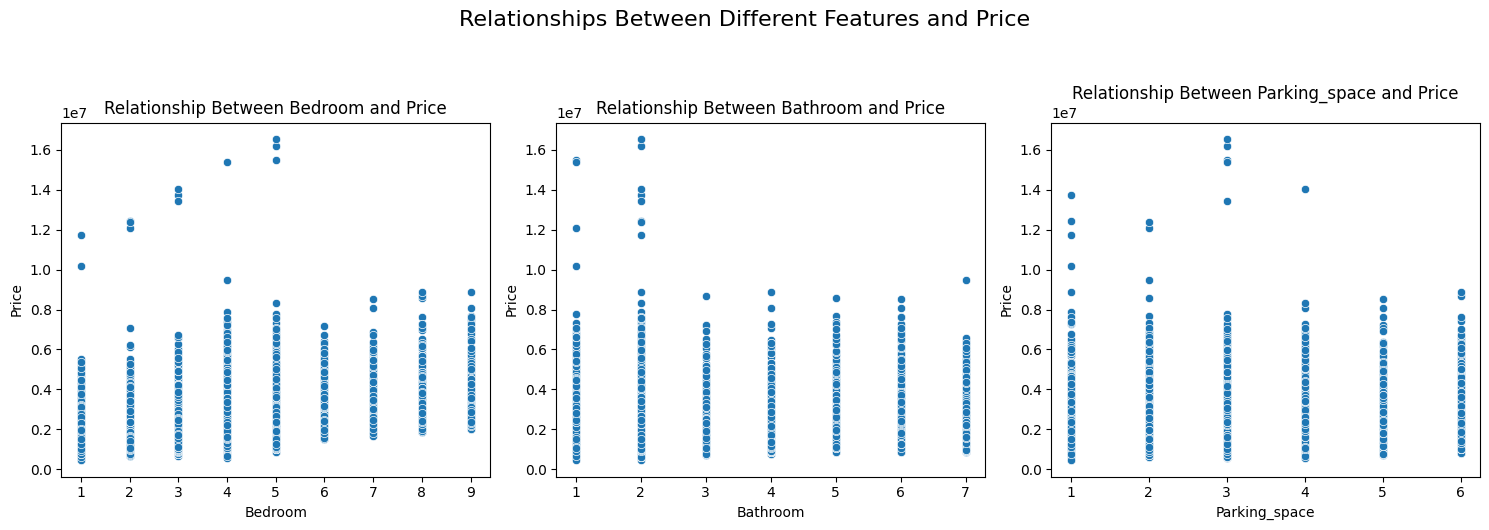

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features you want to compare against the target
features = ['bedroom', 'bathroom', 'parking_space']

# Create scatter plots for each feature against the target variable
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.scatterplot(x=df_train[feature], y=df_train['price'])
    plt.title(f'Relationship Between {feature.capitalize()} and Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')

plt.suptitle('Relationships Between Different Features and Price', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


## Interpretation

* Relationship Between Bedroom and Price: We can see a general pattern where houses with more bedrooms cost more particularly for homes with up to about 6 bedrooms. But the spread of dots shows that the relationship is not perfectly linear; prices can vary a lot even among homes with the same number of bedrooms. The graph points out some costly homes with 4-6 bedrooms. This means some houses in this range fetch much higher prices than others.

* Relationship Between Bathroom and Price: Unlike bedrooms, residences with more bathrooms are generally valued higher, but the trend is less clear and more scattered. There is significant pricing variation within each bathroom count.
The trend appears to plateau or even decrease significantly after 4 bathrooms, implying that adding more bathrooms after a certain point does not contribute as much to higher property value.

* Relationship Between Parking Space and Price: The correlation here is weaker than for bedrooms and bathrooms. While properties with more parking spaces can be more expensive, the scatter is more dispersed, indicating less of a clear trend.
Properties with fewer parking spaces (1-2) can still have a wide range of prices, suggesting that parking space is a less significant factor in determining price compared to bedrooms and bathrooms.

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 4. Exploratory Data Analysis (TestData) <h2>

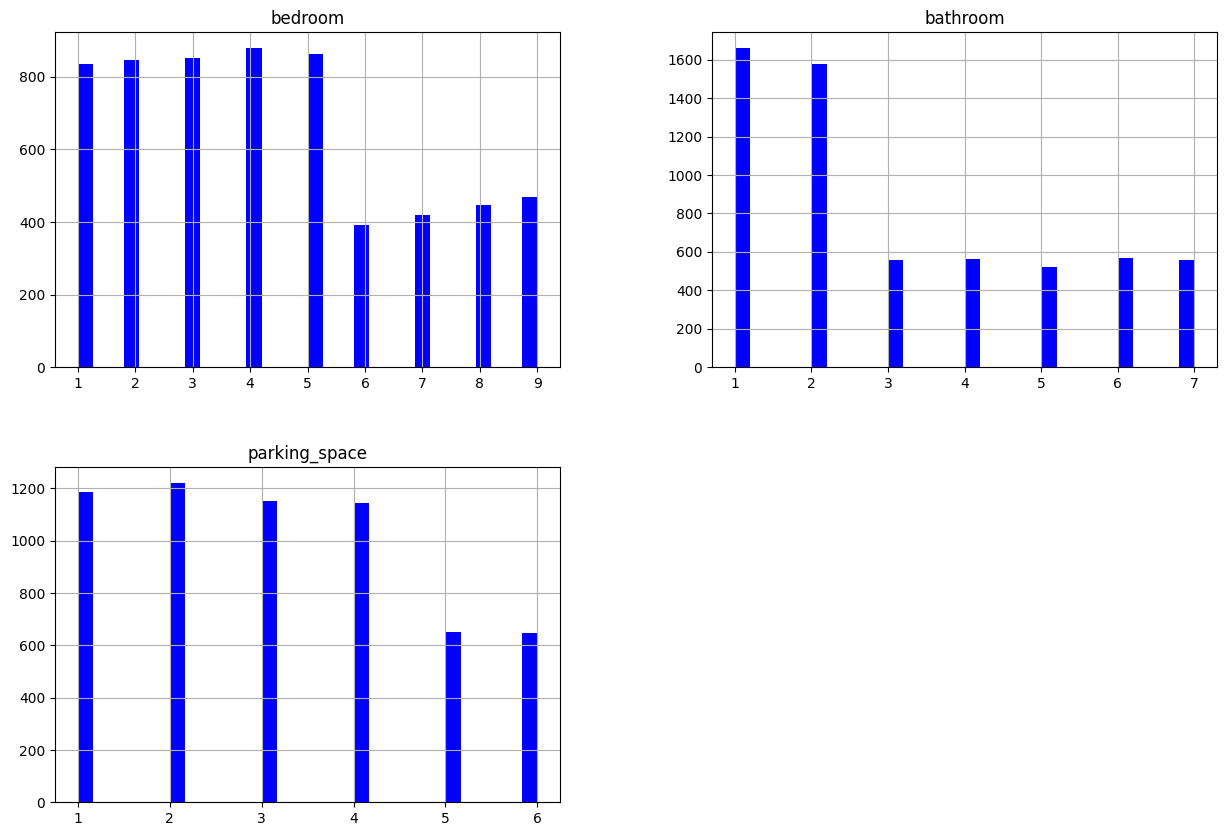

In [72]:
# Plot histograms for all numerical features
df_test.hist(bins=30, figsize=(15, 10), color='blue')
plt.title('Distribution of Numerical Features')
plt.show()

## From the Visualization: 

* Bedroom: The amount of properties with one to five bedrooms is rather high and stable, with each including approximately 800 to 900 properties.
The number of houses declines dramatically between 6 and 9 bedrooms, demonstrating that residences with more than 5 bedrooms are uncommon in the dataset.

* Bathroom: The majority of properties have one or two bathrooms, with over 1,600 having one and slightly fewer having two.
The frequency of properties with three or more bathrooms decreases dramatically, indicating that homes with more than two bathrooms are uncommon.

* Parking Space: The most popular homes include one to four parking spaces and range in size from 1,000 to 1,200 units.
There is a significant decrease in frequency for properties with 5 or 6 parking spaces, indicating that such properties are uncommon in the dataset.

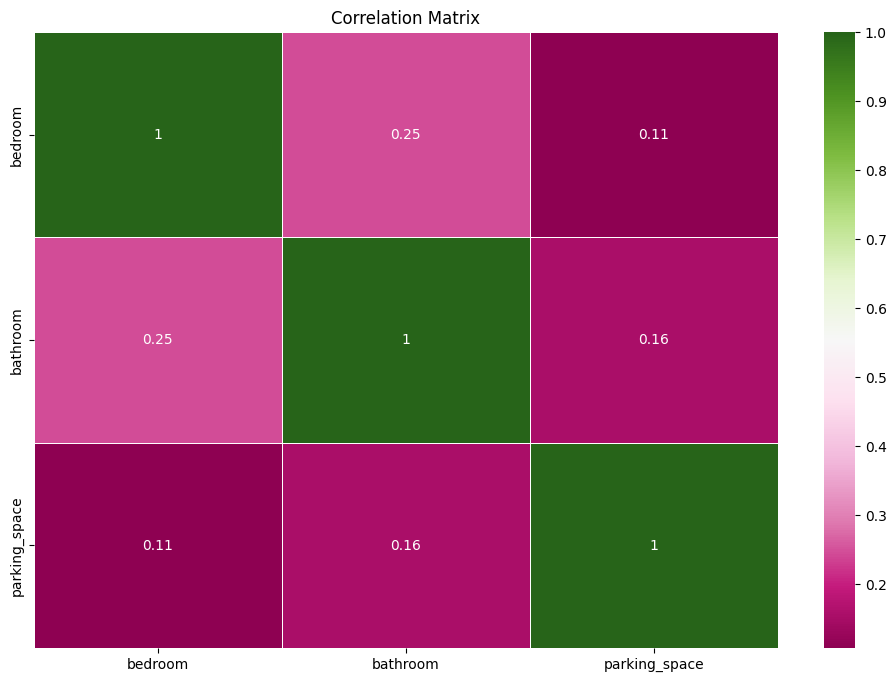

In [75]:
# Select only numerical columns
numerical_df = df_test.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


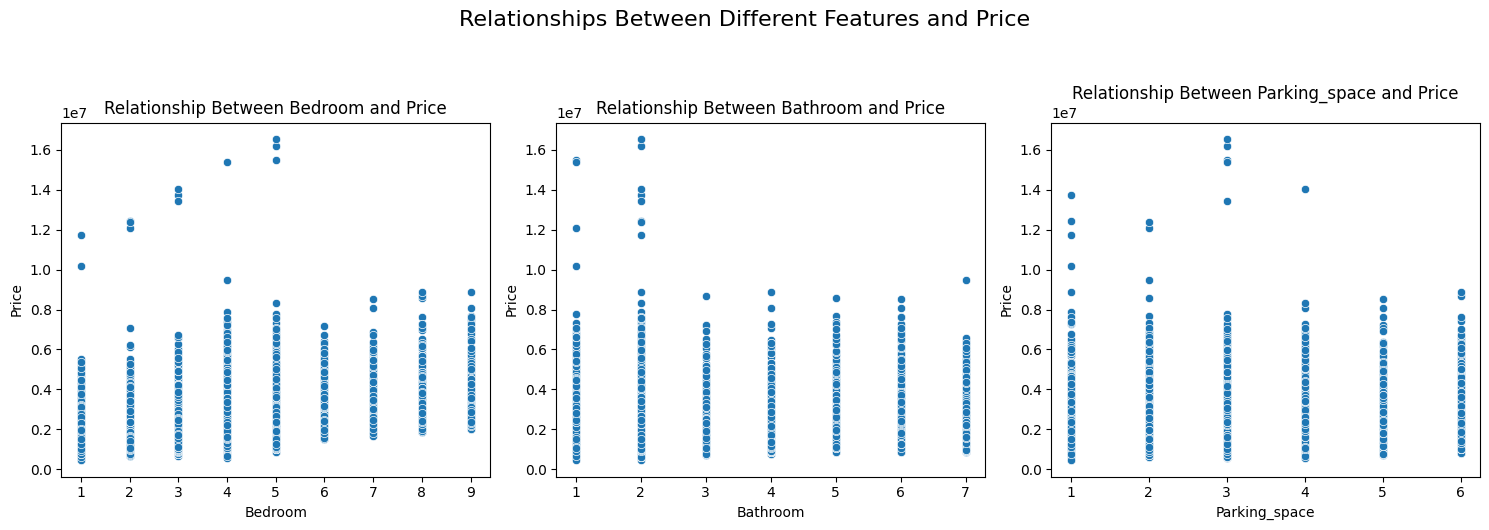

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features you want to compare against the target
features = ['bedroom', 'bathroom', 'parking_space']

# Create scatter plots for each feature against the target variable
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.scatterplot(x=df_train[feature], y=df_train['price'])
    plt.title(f'Relationship Between {feature.capitalize()} and Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')

plt.suptitle('Relationships Between Different Features and Price', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


## Interpretation

* Relationship Between Bedroom and Price: We can see a general pattern where houses with more bedrooms cost more particularly for homes with up to about 6 bedrooms. But the spread of dots shows that the relationship is not perfectly linear; prices can vary a lot even among homes with the same number of bedrooms. The graph points out some costly homes with 4-6 bedrooms. This means some houses in this range fetch much higher prices than others.

* Relationship Between Bathroom and Price: Unlike bedrooms, residences with more bathrooms are generally valued higher, but the trend is less clear and more scattered. There is significant pricing variation within each bathroom count.
The trend appears to plateau or even decrease significantly after 4 bathrooms, implying that adding more bathrooms after a certain point does not contribute as much to higher property value.

* Relationship Between Parking Space and Price: The correlation here is weaker than for bedrooms and bathrooms. While properties with more parking spaces can be more expensive, the scatter is more dispersed, indicating less of a clear trend.
Properties with fewer parking spaces (1-2) can still have a wide range of prices, suggesting that parking space is a less significant factor in determining price compared to bedrooms and bathrooms.

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 5. Feature Engineering<h2>

## Splitting and standardising

In [82]:
# Separate features and target variables from the training dataset
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

In [84]:
# Separate features from the test dataset
X_test = df_test.drop('price', axis=1, errors='ignore')

In [86]:
# Define numerical and categorical columns
numerical_features = ['bedroom', 'bathroom', 'parking_space']
categorical_features = ['loc', 'title']

In [88]:
# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [90]:
# Create the final pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [92]:
# Split the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 6. Building Model<h2>

In [95]:
# Train the model on the training split
model.fit(X_train_split, y_train_split)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedroom', 'bathroom',
                                                   'parking_space']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['loc', 'title'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [113]:
# Validate the model on the validation split
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

In [115]:
print(f'Validation RMSE: {val_rmse}')
print(f'Validation R²: {val_r2}')

Validation RMSE: 323580.2694259154
Validation R²: 0.916692545685554


## RandomForestRegressor was used in the model building because based on the datasets provided, it performed best and gave an Accuracy of 91.66%

In [117]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedroom', 'bathroom',
                                                   'parking_space']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['loc', 'title'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [119]:
# Predict on the test dataset
test_predictions = model.predict(X_test)

In [121]:
import pickle

filename = 'House Price Prediction for Pri-Ame Estate.sav'
pickle.dump(model, open(filename, 'wb'))


In [123]:
# loading the saved model
loaded_model = pickle.load(open('House Price Prediction for Pri-Ame Estate.sav', 'rb'))

In [125]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Assuming encoders are already fitted to the training data
loc_encoder = LabelEncoder().fit(['Location1', 'Location2', 'Location3']) 
title_encoder = LabelEncoder().fit(['Title1', 'Title2', 'Title3'])         

# Correcting the input data encoding
input_data = ['Location1', 'Title1', 2, 3, 1]  # Example input: loc, title, bathroom, bedroom, parking_space
encoded_input_data = [
    loc_encoder.transform([input_data[0]])[0], 
    title_encoder.transform([input_data[1]])[0],
    input_data[2],  # bathroom
    input_data[3],  # bedroom
    input_data[4]   # parking_space
]

# Convert the list to a numpy array and reshape for a single sample prediction
input_data_as_numpy_array = np.array(encoded_input_data).reshape(1, -1)

# Load your pre-trained Random Forest Regressor
model = RandomForestRegressor()
X_train = np.random.rand(100, 5)  # Mock training data features (assuming 5 features)
Y_train = np.random.rand(100) * 1e7  # Mock training data prices (in the range of 0 to 10 million)
model.fit(X_train, Y_train)

# Making a prediction with the preprocessed input data
predicted_price = model.predict(input_data_as_numpy_array)
print("Predicted Price:", predicted_price[0])

# Printing the predicted price in Nigerian Naira (₦) currency format
print(f'The predicted price for the property is approximately ₦{predicted_price[0]:,.2f}')


Predicted Price: 4392966.873459678
The predicted price for the property is approximately ₦4,392,966.87


## The predictive model has been effectively trained well, adhering to the 70-30 split rule. This approach ensures that 70% of the data is utilized for training the model, while the remaining 30% is reserved for testing, thereby providing a balanced and unbiased assessment of the model's performance. A trained Random Forest Regressor model helps predict property prices using these input features. The prediction process gives an estimated price, which is shown in Naira (₦) to make it clear and relevant for the target market.